In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize

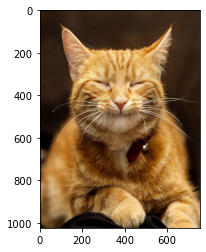

In [2]:
img = plt.imread("Data/Dog_and_Cat/Cat/1.jpg")
plt.imshow(img) # Height of an image is taken as rows & Weight of an image is taken as columns

# Here in the above image the height and width is 753 columns * 1024 rows

In [3]:
from skimage import io, filters

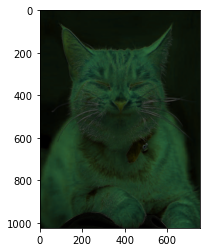

In [4]:
edges = filters.sobel(img)
plt.imshow(edges)

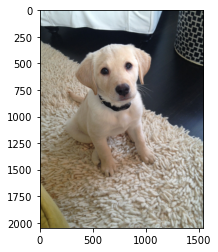

In [5]:
img = plt.imread("Data/Dog_and_Cat/Dog/1.jpg")
plt.imshow(img)

In [6]:
from skimage import io, filters

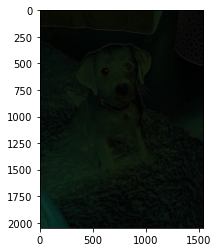

In [7]:
edges = filters.sobel(img)
plt.imshow(edges)

In [8]:
def load_image_files(container_path, dimension=(64, 64)):
    """Loading Multipe Images From the Folder and Which Consists of Different Shape of Data as well as
    
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to the main folder holding one subfolder[Cat,Dog]
    Each and Every category[Cat, Dog]
    
    Dimensions: We Have Bring Different Images into Same equal shape
    """
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    
    descr = """cat and Dog Image Classification Problem"""
    
    images = []
    flat_data = []
    target = []
    
    for i,direc in enumerate(folders):
        for file in direc.iterdir():
            # Before Converting
            img = skimage.io.imread(file)
            plt.imshow(img)
            #plt.show()
            
            # After Converting image
            # Convert Image Shape in 64, 64
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
        
    return Bunch(data=flat_data,
                target=target,
                target_name = categories,
                images = images,
                DESCR = descr)

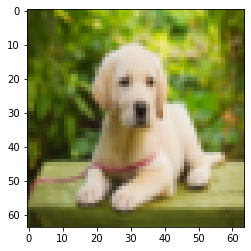

In [9]:
import skimage
image_dataset = load_image_files("Data/Dog_and_Cat/")

In [10]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_name', 'images', 'DESCR'])

In [11]:
image_dataset.data

array([[0.1828125 , 0.11372549, 0.0573223 , ..., 0.65306373, 0.5314951 ,
        0.36211703],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99129902],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       ...,
       [0.87331495, 0.8828125 , 0.90242034, ..., 0.90196078, 0.91372549,
        0.93333333],
       [0.20784314, 0.24485294, 0.13504902, ..., 0.45765931, 0.51053922,
        0.42394684],
       [0.20784314, 0.27033548, 0.07817862, ..., 0.25526961, 0.26285999,
        0.0745098 ]])

In [12]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

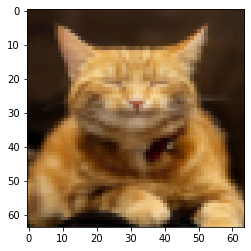

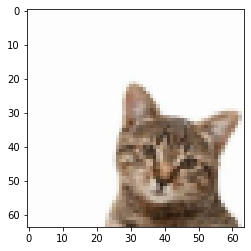

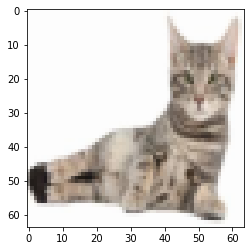

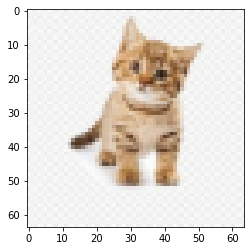

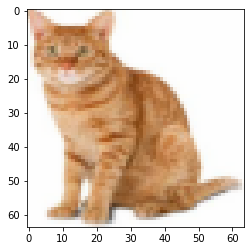

In [13]:
for I in range(5):
    plt.imshow(image_dataset.images[I])
    plt.show()

In [14]:
image_dataset.target_name

['Cat', 'Dog']

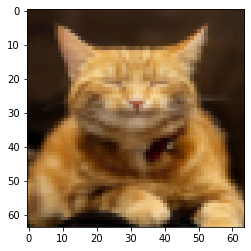

In [15]:
plt.imshow(image_dataset.images[0])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=1)
x_train.shape

(109, 12288)

In [18]:
x_test.shape

(37, 12288)

In [30]:
x_train.shape[0] != y_test.shape[0]

True

### Task:
1. Apply Logistic, Bayes, KNN
2. Apply Classification Report
3. Apply Confusion Matrix
5. ROC and AUC Curves


In [19]:
from sklearn.linear_model import LogisticRegression


In [45]:
LR = LogisticRegression(max_iter=500,solver="newton-cg",C=0.001)
LR

LogisticRegression(C=0.001, max_iter=500, solver='newton-cg')

In [46]:
LR.fit(x_train,y_train)


LogisticRegression(C=0.001, max_iter=500, solver='newton-cg')

In [47]:
Train_Score = LR.score(x_train,y_train)
Train_Score

0.8348623853211009

In [48]:
Test_score = LR.score(x_test,y_test)
Test_score

0.8378378378378378

In [51]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [52]:
pd.DataFrame({"Actual Data":y_test,
             "New_predication":yhat})

,Actual Data,New_predication
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,0
8,0,1
9,0,0


In [54]:
log_loss = LR.predict_proba(x_train)
log_loss

array([[0.16367368, 0.83632632],
       [0.78441026, 0.21558974],
       [0.81011708, 0.18988292],
       [0.30318627, 0.69681373],
       [0.76394433, 0.23605567],
       [0.3528321 , 0.6471679 ],
       [0.7559475 , 0.2440525 ],
       [0.72820684, 0.27179316],
       [0.80227332, 0.19772668],
       [0.80044222, 0.19955778],
       [0.8087181 , 0.1912819 ],
       [0.30457379, 0.69542621],
       [0.25096085, 0.74903915],
       [0.18453876, 0.81546124],
       [0.24970481, 0.75029519],
       [0.8233593 , 0.1766407 ],
       [0.27599131, 0.72400869],
       [0.12108769, 0.87891231],
       [0.48922744, 0.51077256],
       [0.37381871, 0.62618129],
       [0.76309255, 0.23690745],
       [0.3133755 , 0.6866245 ],
       [0.82749406, 0.17250594],
       [0.81492954, 0.18507046],
       [0.3158355 , 0.6841645 ],
       [0.25271206, 0.74728794],
       [0.11859058, 0.88140942],
       [0.67370919, 0.32629081],
       [0.1907561 , 0.8092439 ],
       [0.27163008, 0.72836992],
       [0.

In [55]:

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [56]:
cm = confusion_matrix(y_test,yhat)
cm

array([[14,  3],
       [ 3, 17]], dtype=int64)

In [57]:
print(classification_report(y_test,yhat))


              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.85      0.85      0.85        20

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



In [58]:
accuracy_score(y_test,yhat)


0.8378378378378378

In [59]:
from sklearn.neighbors import KNeighborsClassifier


In [60]:
Knn = KNeighborsClassifier(n_neighbors=10)


In [61]:
Knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [64]:
Train_score = Knn.score(x_train,y_train)
Train_Score


0.8348623853211009

In [66]:
Test_score = Knn.score(x_test,y_test)
Test_score

0.8378378378378378

In [67]:
Knn.classes_


array([0, 1])

In [69]:
Knn.predict_proba(x_train)


array([[0.3, 0.7],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.9, 0.1],
       [1. , 0. ],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.3, 0.7],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.3, 0.7],
       [0. , 1. ],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.3, 0.7],
       [0.6, 0.4],
       [0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.2,

In [70]:
from sklearn.metrics import confusion_matrix


In [71]:
cm  = confusion_matrix(y_test, yhat)


In [72]:
print(cm)


[[14  3]
 [ 3 17]]


In [73]:

True_positive = cm[0,0]
True_positive

14

In [74]:

False_negative = cm[0,1]
False_negative

3

In [75]:

False_positive = cm[1,0]
False_positive

3

In [76]:
True_negative = cm[1,1]
True_negative

17

In [77]:
prediction_error = (False_positive + False_negative)/False_positive + False_negative + True_positive + True_negative
prediction_error

36.0

In [78]:
Accuracy_model = True_positive + True_negative / False_positive + False_negative + True_positive + True_negative
Accuracy_model

53.66666666666667

In [91]:

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[17  3]
 [ 3 14]]


Normalized confusion matrix
[[0.85 0.15]
 [0.18 0.82]]


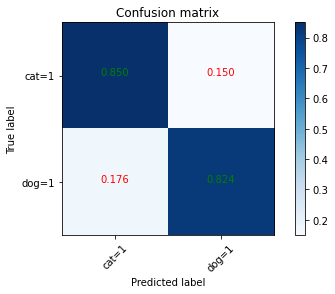

In [92]:

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['cat=0','dog=1'],normalize= True,  title='Confusion matrix')